#<center>QC NKI Checker-Board task</center> 

# Purpose
NKI  data have some timing mismatch beteween the onset file and the raw data for visual paradigm.
The announced total time in the [nki_site](http://fcon_1000.projects.nitrc.org/indi/enhanced/mri_protocol.html) is  __`2.5 mn`__ and here is the timing file :

```
Checker Block Paradigm:
block_types     = [ FIXATION, CHECKER, FIXATION, CHECKER, FIXATION, CHECKER ] 
block_durations = [ 20.0,     20.0,    20.0,     20.0,    20.0,     20.0 ] # seconds
```

so, if you calculate `20*6=120÷60= 2mn` , but in the website it is written  2.5mn it means 2mn 30sec

Then if we check in the raw data :

```
ssh magma
cd /peuplier/database4/nki_enhanced/release1/raw_mnc/0102157/TfMRI_visualCheckerboard_1400
mincinfo func.mnc.gz 
file: func.mnc.gz
image: signed__ short 0 to 2424
image dimensions: time zspace yspace xspace
    dimension name         length         step        start
    --------------         ------         ----        -----
    time                       98          1.4            0
    zspace                     64            2     -11.6919
    yspace                    112            2     -92.3946
    xspace                    112           -2          112
```

here you can calculate `98 *1.4 = 137.2÷60 = 2mn 17.20sec`

<p><u>**To sum up, in the breath hold, the miss match here is as follow: in the website it is written 2.5mn, in the onset file 2mn and in the raw data 2mn 17.20sec**</u>.</p>


###Summary QC EXP
1. Plot raw EPI time series from subject 0100451 for TR 1400 and 645
2. Plot Preprocessed EPI time series from subject 0100451 for TR 1400 and 645

### 1. Raw EPI

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [51]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import nibabel as nib
import scipy.io as sio
from nilearn import plotting, image
from nilearn.image.image import mean_img
from nilearn.plotting.img_plotting import plot_epi, plot_roi

### a. TR 1400

In [3]:
### Read data ################################################################
# Compute the mean EPI: we do the mean along the axis 3, which is time
func_filename = '../checkerboard/0100451_raw/TfMRI_visualCheckerboard_1400/func.nii.gz'
fmri_img = image.smooth_img(func_filename, fwhm=6)
mean_smooth_epi = mean_img(fmri_img)

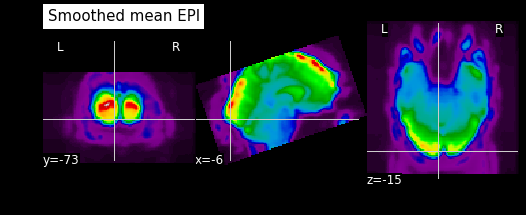

In [4]:
# Plot the mean EPI
plot_epi(mean_smooth_epi,title='Smoothed mean EPI', cut_coords=(-6,-73,-15))

In [5]:
# Data shape
in_image_raw = nib.load(func_filename)
in_vol_raw = in_image_raw.get_data()
in_vol_raw.shape

(112, 112, 64, 98)

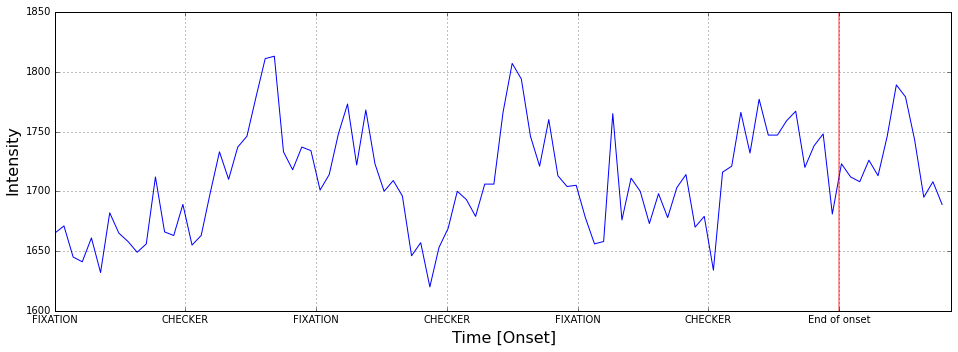

In [26]:
# plot raw time series from the the primery visual erea
time_series = in_vol_raw[53,17,32,:]
plt.figure(figsize=(15, 5))
plt.plot(time_series)
plt.xlabel('Time [Onset]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, in_vol_raw.shape[-1])
ticks_num = np.array(range(0,121,20))/1.4
ticks_labels = [ 'FIXATION', 'CHECKER']*3 + ['End of onset']
plt.axvline(x=ticks_num[-1], color='r',alpha=0.4, linewidth=2)
plt.xticks(ticks_num,ticks_labels)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)
plt.grid()
plt.show()

### b. TR 645

In [27]:
### Read data ################################################################
# Compute the mean EPI: we do the mean along the axis 3, which is time
func_filename = '../checkerboard/0100451_raw/TfMRI_visualCheckerboard_645/func.nii.gz'
fmri_img = image.smooth_img(func_filename, fwhm=6)
mean_smooth_epi = mean_img(fmri_img)

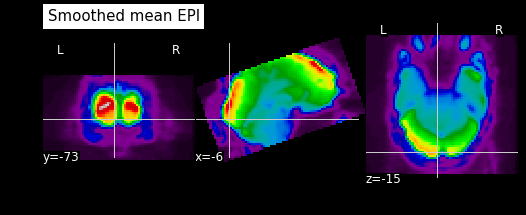

In [28]:
# Plot the mean EPI
plot_epi(mean_smooth_epi,title='Smoothed mean EPI', cut_coords=(-6,-73,-15))

In [29]:
# Data shape
in_image_raw = nib.load(func_filename)
in_vol_raw = in_image_raw.get_data()
in_vol_raw.shape

(74, 74, 40, 240)

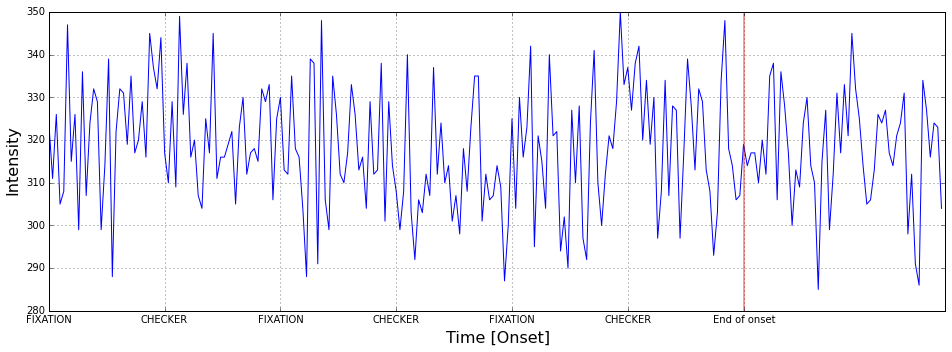

In [32]:
# plot raw time series from the the primery visual erea
time_series = in_vol_raw[53,17,32,:]
plt.figure(figsize=(15, 5))
plt.plot(time_series)
plt.xlabel('Time [Onset]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, in_vol_raw.shape[-1])
ticks_num = np.array(range(0,121,20))/0.645
ticks_labels = [ 'FIXATION', 'CHECKER']*3 + ['End of onset']
plt.axvline(x=ticks_num[-1], color='r',alpha=0.4, linewidth=2)
plt.xticks(ticks_num,ticks_labels)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)
plt.grid()
plt.show()

### 2. Preprocessed EPI

### a. TR 1400

In [54]:
### Read data ################################################################
# Compute the mean EPI: we do the mean along the axis 3, which is time
func_filename = '../checkerboard/0100451_preproc/fmri_X0100451_sess1_checBoard1400.nii.gz'
fmri_img = image.smooth_img(func_filename, fwhm=6)
mean_smooth_epi = mean_img(fmri_img)

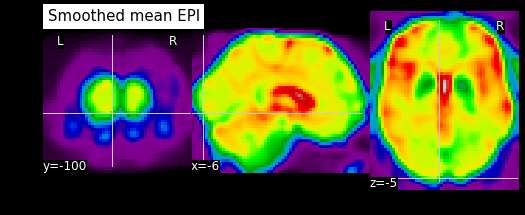

In [56]:
# Plot the mean EPI
plot_epi(mean_smooth_epi,title='Smoothed mean EPI', cut_coords=(-6,-100,-5))

In [57]:
# Data shape
in_image_raw = nib.load(func_filename)
in_vol_raw = in_image_raw.get_data()
in_vol_raw.shape

(53, 64, 52, 98)

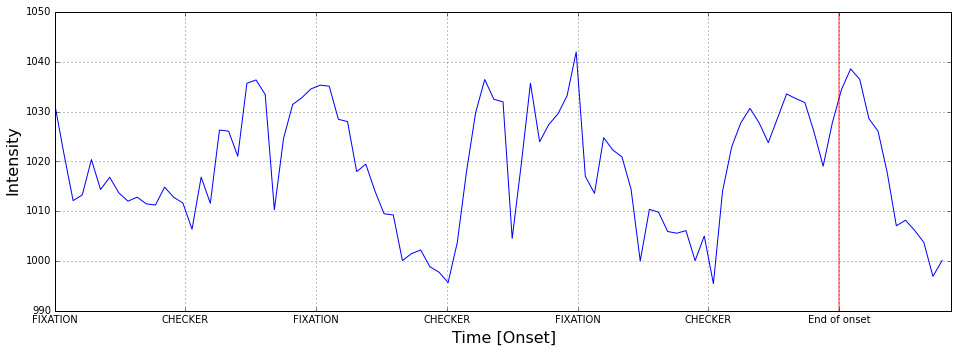

In [61]:
# plot raw time series from the the primery visual erea
time_series = in_vol_raw[25,5,22,:]
plt.figure(figsize=(15, 5))
plt.plot(time_series)
plt.xlabel('Time [Onset]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, in_vol_raw.shape[-1])
ticks_num = np.array(range(0,121,20))/1.4
ticks_labels = [ 'FIXATION', 'CHECKER']*3 + ['End of onset']
plt.axvline(x=ticks_num[-1], color='r',alpha=0.4, linewidth=2)
plt.xticks(ticks_num,ticks_labels)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)
plt.grid()
plt.show()

### b. TR 645

In [65]:
### Read data ################################################################
# Compute the mean EPI: we do the mean along the axis 3, which is time
func_filename = '../checkerboard/0100451_preproc/fmri_X0100451_sess1_checBoard645.nii.gz'
fmri_img = image.smooth_img(func_filename, fwhm=6)
mean_smooth_epi = mean_img(fmri_img)

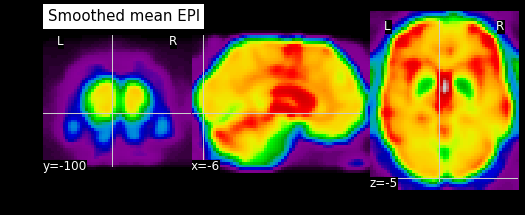

In [66]:
# Plot the mean EPI
plot_epi(mean_smooth_epi,title='Smoothed mean EPI', cut_coords=(-6,-100,-5))

In [63]:
# Data shape
in_image_raw = nib.load(func_filename)
in_vol_raw = in_image_raw.get_data()
in_vol_raw.shape

(53, 64, 52, 240)

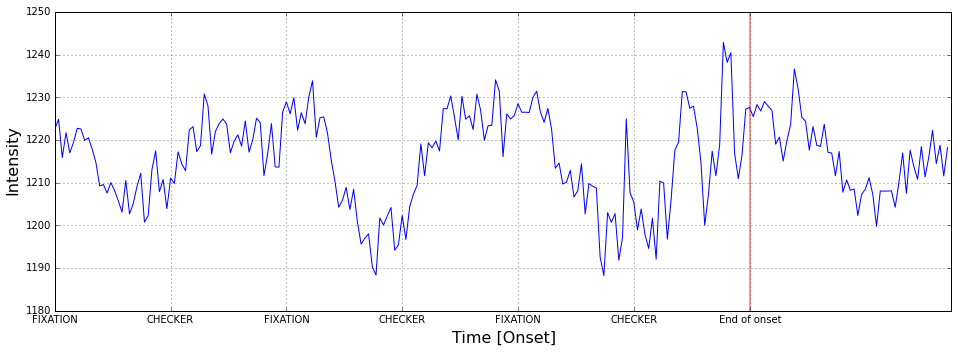

In [67]:
# plot raw time series from the the primery visual erea
time_series = in_vol_raw[25,5,22,:]
plt.figure(figsize=(15, 5))
plt.plot(time_series)
plt.xlabel('Time [Onset]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, in_vol_raw.shape[-1])
ticks_num = np.array(range(0,121,20))/0.645
ticks_labels = [ 'FIXATION', 'CHECKER']*3 + ['End of onset']
plt.axvline(x=ticks_num[-1], color='r',alpha=0.4, linewidth=2)
plt.xticks(ticks_num,ticks_labels)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)
plt.grid()
plt.show()

###Result:
1. Raw (and preprocessed) data shows about 17 seconds time difference compared to the onset file.
2. It looks like the thirs blocs has aloso fixation time that is not reported in the onset file 